In [1]:
import pandas as pd

# Load the data
data_path = r"C:\Users\Gebruiker\Downloads\Rookie_Data_without_Success___0.csv"  # Corrected path with raw string format
rookie_data_df = pd.read_csv(data_path)

# Redefine success classification with 1 as "Low Success" and 2 and above as "High Success"
rookie_data_filtered = rookie_data_df[rookie_data_df['success'] > 0].copy()
rookie_data_filtered['Success_Class'] = rookie_data_filtered['success'].apply(lambda x: 'High Success' if x >= 2 else 'Low Success')

# Check the distribution of the newly defined Success_Class
success_class_distribution = rookie_data_filtered['Success_Class'].value_counts(normalize=True) * 100
success_class_distribution_summary = success_class_distribution.to_frame(name='Percentage')

# Displaying the filtered dataset
print("Filtered Rookie Data:")
print(rookie_data_filtered.head())  # Displaying the first few rows of filtered data

# Displaying the success class distribution summary
print("\nSuccess Class Distribution Summary:")
print(success_class_distribution_summary)


Filtered Rookie Data:
   Unnamed: 0             Player         Debut  Age   G    MP    FG%    3P%  \
0          89  victor wembanyama  202310250SAS   20  52  1481  0.467  0.318   
1          94     paolo banchero  202210190DET   20  72  2430  0.427  0.298   
2         182     scottie barnes  202110200TOR   20  74  2617  0.492  0.301   
3         229      herbert jones  202110200NOP   23  78  2335  0.476  0.337   
4         248        evan mobley  202110200MEM   20  69  2331  0.508  0.250   

     FT%  PER GAME MP  ...  PER GAME BLK  PER GAME TOV     Season  \
0  0.813         28.5  ...           3.3           3.4  2023-2024   
1  0.738         33.8  ...           0.5           2.8  2022-2023   
2  0.735         35.4  ...           0.7           1.8  2021-2022   
3  0.840         29.9  ...           0.8           1.3  2021-2022   
4  0.663         33.8  ...           1.7           1.9  2021-2022   

   All-League Team  Rookie of the Year  Defensive Award Winner MVP Winner  \
0          

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_19604\3748314229.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data
data_path = r"C:\Users\Gebruiker\Downloads\Rookie_Data_without_Success___0.csv"  # Path to your dataset
rookie_data_df = pd.read_csv(data_path)

# Redefine success classification with 1 as "Low Success" and 2 and above as "High Success"
rookie_data_filtered = rookie_data_df[rookie_data_df['success'] > 0].copy()
rookie_data_filtered['Success_Class'] = rookie_data_filtered['success'].apply(lambda x: 'High Success' if x >= 2 else 'Low Success')

# Select features and target variable
features = ["Age", "G", "MP", "FG%", "3P%", "FT%", "PER GAME MP", "PER GAME PTS", 
            "PER GAME TRB", "PER GAME AST", "PER GAME STL", "PER GAME BLK", "PER GAME TOV"]
X = rookie_data_filtered[features]
y = rookie_data_filtered["Success_Class"]

# Encode 'Low Success' as 0 and 'High Success' as 1
y_encoded = y.map({"Low Success": 0, "High Success": 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Train an SVM model with default parameters
svm_model = SVC(kernel='rbf', probability=True, random_state=42)  # RBF kernel as default
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Convert predictions (0 and 1) back to original labels ('Low Success' and 'High Success')
y_pred_labels = pd.Series(y_pred).map({0: 'Low Success', 1: 'High Success'})

# Map y_test to the original labels
y_test_labels = y_test.map({0: 'Low Success', 1: 'High Success'})

# Evaluate the model performance
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f"Accuracy: {accuracy:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred_labels))


Accuracy: 0.6747

Classification Report:
              precision    recall  f1-score   support

High Success       0.00      0.00      0.00        27
 Low Success       0.67      1.00      0.81        56

    accuracy                           0.67        83
   macro avg       0.34      0.50      0.40        83
weighted avg       0.46      0.67      0.54        83


Confusion Matrix:
[[ 0 27]
 [ 0 56]]


C:\Users\Gebruiker\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gebruiker\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gebruiker\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

Doesnt recognise High success at all

SMOTEEEN

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.combine import SMOTEENN

# Load the data
data_path = r"C:\Users\Gebruiker\Downloads\Rookie_Data_without_Success___0.csv"  # Replace with your actual path
rookie_data_df = pd.read_csv(data_path)

# Redefine success classification: 1 as "Low Success" and 2 and above as "High Success"
rookie_data_filtered = rookie_data_df[rookie_data_df['success'] > 0].copy()
rookie_data_filtered['Success_Class'] = rookie_data_filtered['success'].apply(
    lambda x: 'High Success' if x >= 2 else 'Low Success'
)

# Select features and target variable
features = [
    "Age", "G", "MP", "FG%", "3P%", "FT%", "PER GAME MP", "PER GAME PTS",
    "PER GAME TRB", "PER GAME AST", "PER GAME STL", "PER GAME BLK", "PER GAME TOV"
]
X = rookie_data_filtered[features]
y = rookie_data_filtered["Success_Class"]

# Encode 'Low Success' as 0 and 'High Success' as 1
y_encoded = y.map({"Low Success": 0, "High Success": 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# Apply SMOTEENN to balance the training dataset
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Initialize the SVM model with default parameters or specify them manually
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)

# Train the SVM model on the resampled training data
svm_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Convert predictions (0 and 1) back to original labels ('Low Success' and 'High Success')
y_pred_labels = pd.Series(y_pred).map({0: 'Low Success', 1: 'High Success'})

# Map y_test to the original labels
y_test_labels = y_test.map({0: 'Low Success', 1: 'High Success'})

# Evaluate the model performance
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f"Accuracy: {accuracy:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred_labels))


Accuracy: 0.6867

Classification Report:
              precision    recall  f1-score   support

High Success       0.56      0.52      0.54        29
 Low Success       0.75      0.78      0.76        54

    accuracy                           0.69        83
   macro avg       0.65      0.65      0.65        83
weighted avg       0.68      0.69      0.68        83


Confusion Matrix:
[[15 14]
 [12 42]]


checking best parameters

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.combine import SMOTEENN  # For handling imbalanced data

# Load the data
data_path = r"C:\Users\Gebruiker\Downloads\Rookie_Data_without_Success___0.csv"  # Corrected path with raw string format
rookie_data_df = pd.read_csv(data_path)

# Redefine success classification with 1 as "Low Success" and 2 and above as "High Success"
rookie_data_filtered = rookie_data_df[rookie_data_df['success'] > 0].copy()
rookie_data_filtered['Success_Class'] = rookie_data_filtered['success'].apply(lambda x: 'High Success' if x >= 2 else 'Low Success')

# Select your features and target variable
features = ["Age", "G", "MP", "FG%", "3P%", "FT%", "PER GAME MP", "PER GAME PTS", 
            "PER GAME TRB", "PER GAME AST", "PER GAME STL", "PER GAME BLK", "PER GAME TOV"]

X = rookie_data_filtered[features]
y = rookie_data_filtered["Success_Class"]

# Encode 'Low Success' as 0 and 'High Success' as 1
y_encoded = y.map({"Low Success": 0, "High Success": 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Apply SMOTEENN to balance the dataset
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Define SVM with GridSearchCV for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],            # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel types
    'gamma': ['scale', 'auto'],   # Kernel coefficient
}

svm = SVC(probability=True, random_state=42)  # Set probability=True for SHAP or threshold tuning later
grid_search = GridSearchCV(svm, param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the best SVM model
best_svm = grid_search.best_estimator_
best_svm.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = best_svm.predict(X_test)

# Convert predictions (0 and 1) back to original labels ('Low Success' and 'High Success')
y_pred_labels = pd.Series(y_pred).map({0: 'Low Success', 1: 'High Success'})

# Map y_test to the original labels
y_test_labels = y_test.map({0: 'Low Success', 1: 'High Success'})

# Evaluate the model performance
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f"Accuracy: {accuracy:.4f}")

# Display classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred_labels))


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.7108

Classification Report:
              precision    recall  f1-score   support

High Success       0.54      0.74      0.62        27
 Low Success       0.85      0.70      0.76        56

    accuracy                           0.71        83
   macro avg       0.69      0.72      0.69        83
weighted avg       0.75      0.71      0.72        83


Confusion Matrix:
[[20  7]
 [17 39]]


Finetuning threshold for higher F1 score

Best Threshold: 0.37
Best F1-Score: 0.6441


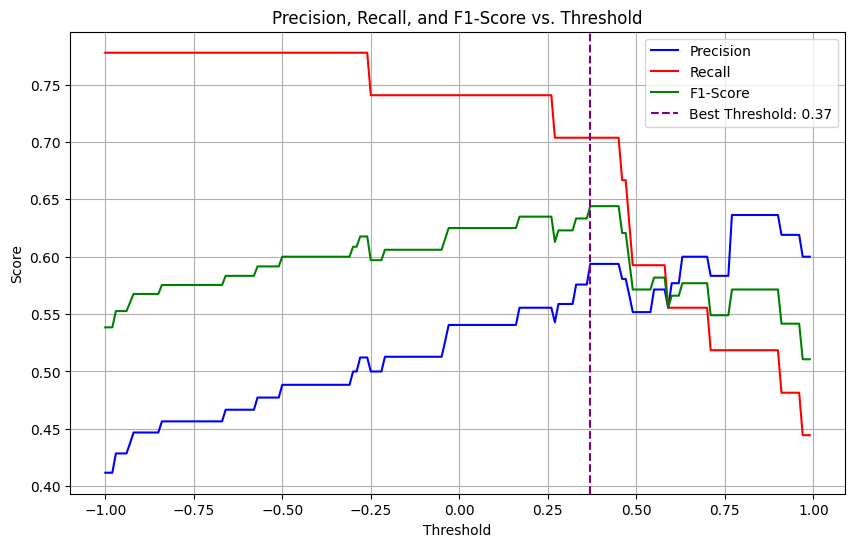

In [11]:
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score

# Get predicted probabilities for the test set (decision function scores for class 1: High Success)
y_pred_prob = best_svm.decision_function(X_test)

# Define a range of thresholds to evaluate
thresholds = np.arange(-1.0, 1.0, 0.01)  # Decision function typically ranges [-1, 1]

# Lists to store performance metrics for each threshold
f1_scores = []
precisions = []
recalls = []

# Loop through different thresholds
for threshold in thresholds:
    # Classify based on the current threshold
    y_pred_threshold = (y_pred_prob >= threshold).astype(int)
    
    # Compute metrics
    f1 = f1_score(y_test, y_pred_threshold)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    
    # Append results
    f1_scores.append(f1)
    precisions.append(precision)
    recalls.append(recall)

# Find the best threshold for F1-score
best_f1_index = np.argmax(f1_scores)
best_threshold = thresholds[best_f1_index]
best_f1 = f1_scores[best_f1_index]

# Display the best threshold and corresponding F1 score
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best F1-Score: {best_f1:.4f}")

# Plot the precision-recall-F1 scores vs. thresholds
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label="Precision", color="blue")
plt.plot(thresholds, recalls, label="Recall", color="red")
plt.plot(thresholds, f1_scores, label="F1-Score", color="green")
plt.axvline(x=best_threshold, color='purple', linestyle='--', label=f"Best Threshold: {best_threshold:.2f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-Score vs. Threshold")
plt.legend()
plt.grid()
plt.show()


In [12]:
# Classify based on the best threshold
y_pred_optimized = (y_pred_prob >= best_threshold).astype(int)

# Evaluate metrics with the optimized threshold
from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print("\nClassification Report with Optimized Threshold:")
print(classification_report(y_test, y_pred_optimized, target_names=['Low Success', 'High Success']))

# Confusion matrix
print("\nConfusion Matrix with Optimized Threshold:")
print(confusion_matrix(y_test, y_pred_optimized))



Classification Report with Optimized Threshold:
              precision    recall  f1-score   support

 Low Success       0.84      0.77      0.80        56
High Success       0.59      0.70      0.64        27

    accuracy                           0.75        83
   macro avg       0.72      0.74      0.72        83
weighted avg       0.76      0.75      0.75        83


Confusion Matrix with Optimized Threshold:
[[43 13]
 [ 8 19]]


Average Statistics for Predicted Classes (SVM):
                       Age          G           MP       FG%       3P%  \
Predicted_Class                                                          
High Success     20.718750  76.468750  2517.187500  0.474625  0.232875   
Low Success      22.254902  61.078431  1347.039216  0.454569  0.149647   

                      FT%  PER GAME MP  PER GAME PTS  PER GAME TRB  \
Predicted_Class                                                      
High Success     0.750687    32.909375     15.956250      6.490625   
Low Success      0.610843    19.254902      7.692157      3.849020   

                 PER GAME AST  PER GAME STL  PER GAME BLK  PER GAME TOV  
Predicted_Class                                                          
High Success         3.956250      1.162500      0.871875      2.609375  
Low Success          1.554902      0.733333      0.731373      0.988235  


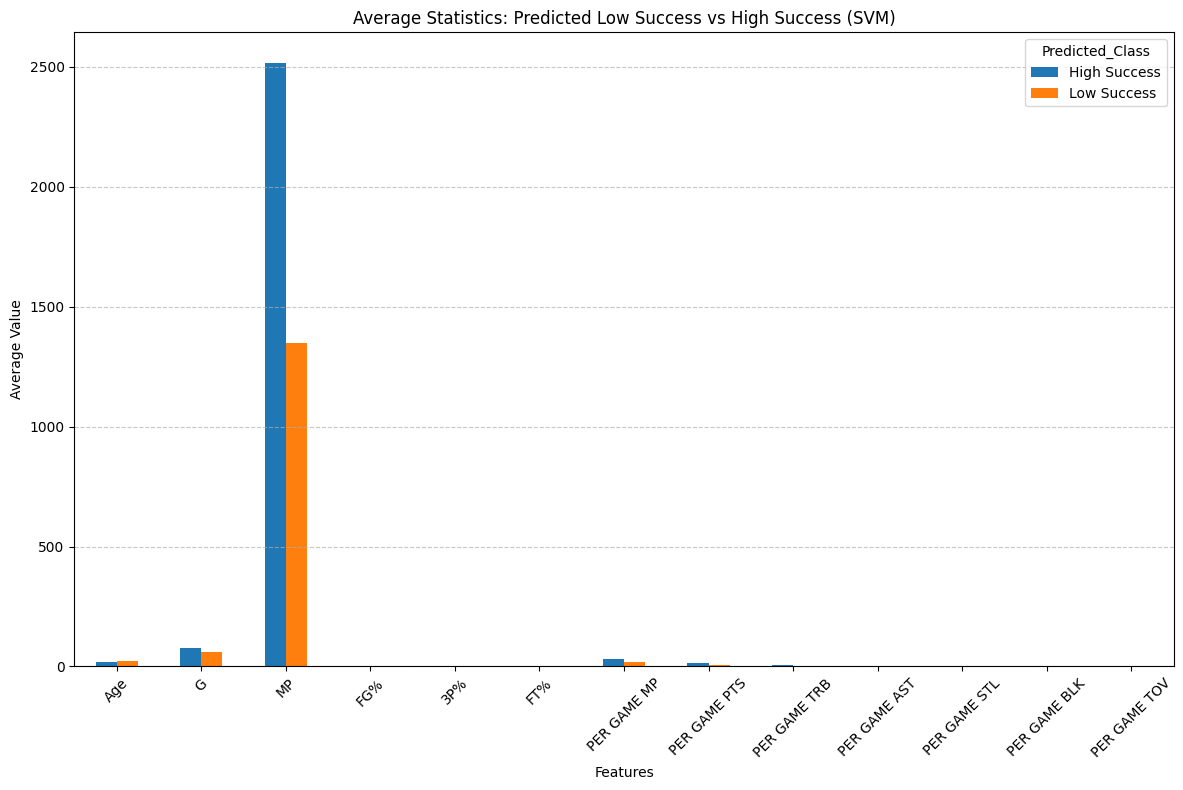

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Get predictions from the SVM model with the optimized threshold
y_pred_prob_svm = best_svm.decision_function(X_test)  # Decision scores
y_pred_svm = (y_pred_prob_svm >= best_threshold).astype(int)  # Apply the optimized threshold

# Map predictions to readable labels
label_mapping = {0: "Low Success", 1: "High Success"}
y_pred_mapped_svm = pd.Series(y_pred_svm, index=X_test.index).map(label_mapping)

# Add predictions to the test dataset
X_test_with_predictions_svm = X_test.copy()
X_test_with_predictions_svm['Predicted_Class'] = y_pred_mapped_svm

# Calculate average stats for predicted classes
average_stats_svm = X_test_with_predictions_svm.groupby("Predicted_Class").mean()

# Display the results
print("Average Statistics for Predicted Classes (SVM):")
print(average_stats_svm)

# Optional: Visualization
# Transpose the DataFrame for easier plotting
average_stats_svm_transposed = average_stats_svm.T

# Plot the average stats
average_stats_svm_transposed.plot(kind='bar', figsize=(12, 8), title="Average Statistics: Predicted Low Success vs High Success (SVM)")
plt.ylabel("Average Value")
plt.xlabel("Features")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Average Statistics for Predicted Classes (SVM):
                       Age          G           MP       FG%       3P%  \
Predicted_Class                                                          
High Success     20.718750  76.468750  2517.187500  0.474625  0.232875   
Low Success      22.254902  61.078431  1347.039216  0.454569  0.149647   

                      FT%  PER GAME MP  PER GAME PTS  PER GAME TRB  \
Predicted_Class                                                      
High Success     0.750687    32.909375     15.956250      6.490625   
Low Success      0.610843    19.254902      7.692157      3.849020   

                 PER GAME AST  PER GAME STL  PER GAME BLK  PER GAME TOV  
Predicted_Class                                                          
High Success         3.956250      1.162500      0.871875      2.609375  
Low Success          1.554902      0.733333      0.731373      0.988235  


<Figure size 1200x800 with 0 Axes>

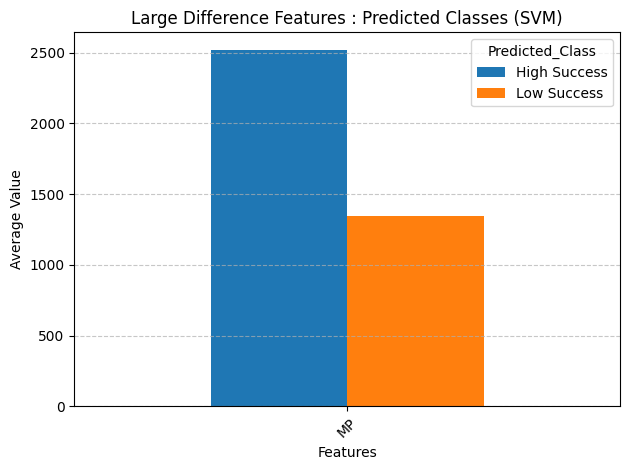

<Figure size 1200x800 with 0 Axes>

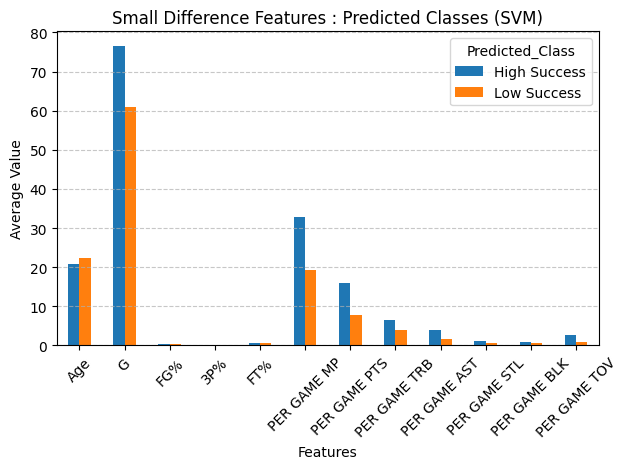

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Get predictions from the SVM model with the optimized threshold
y_pred_prob_svm = best_svm.decision_function(X_test)  # Decision scores
y_pred_svm = (y_pred_prob_svm >= best_threshold).astype(int)  # Apply optimized threshold

# Map predictions to readable labels
label_mapping = {0: "Low Success", 1: "High Success"}
y_pred_mapped_svm = pd.Series(y_pred_svm, index=X_test.index).map(label_mapping)

# Add predictions to the test dataset
X_test_with_predictions_svm = X_test.copy()
X_test_with_predictions_svm['Predicted_Class'] = y_pred_mapped_svm

# Calculate average stats for predicted classes
average_stats_svm = X_test_with_predictions_svm.groupby("Predicted_Class").mean()

# Display the results
print("Average Statistics for Predicted Classes (SVM):")
print(average_stats_svm)

# Calculate differences between average values for features
diffs_svm = average_stats_svm.max() - average_stats_svm.min()

# Define a threshold to separate large vs small differences
threshold = 100  # Adjust based on data scale

# Identify features with large and small differences
large_diff_features_svm = diffs_svm[diffs_svm > threshold].index
small_diff_features_svm = diffs_svm[diffs_svm <= threshold].index

# Transpose the DataFrame for easier plotting
average_stats_svm_transposed = average_stats_svm.T

# Plot the large difference features
if not large_diff_features_svm.empty:
    plt.figure(figsize=(12, 8))
    average_stats_svm_transposed.loc[large_diff_features_svm].plot(
        kind='bar', title=f"Large Difference Features : Predicted Classes (SVM)"
    )
    plt.ylabel("Average Value")
    plt.xlabel("Features")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No features with large differences found based on the threshold.")

# Plot the small difference features
if not small_diff_features_svm.empty:
    plt.figure(figsize=(12, 8))
    average_stats_svm_transposed.loc[small_diff_features_svm].plot(
        kind='bar', title=f"Small Difference Features : Predicted Classes (SVM)"
    )
    plt.ylabel("Average Value")
    plt.xlabel("Features")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No features with small differences found based on the threshold.")


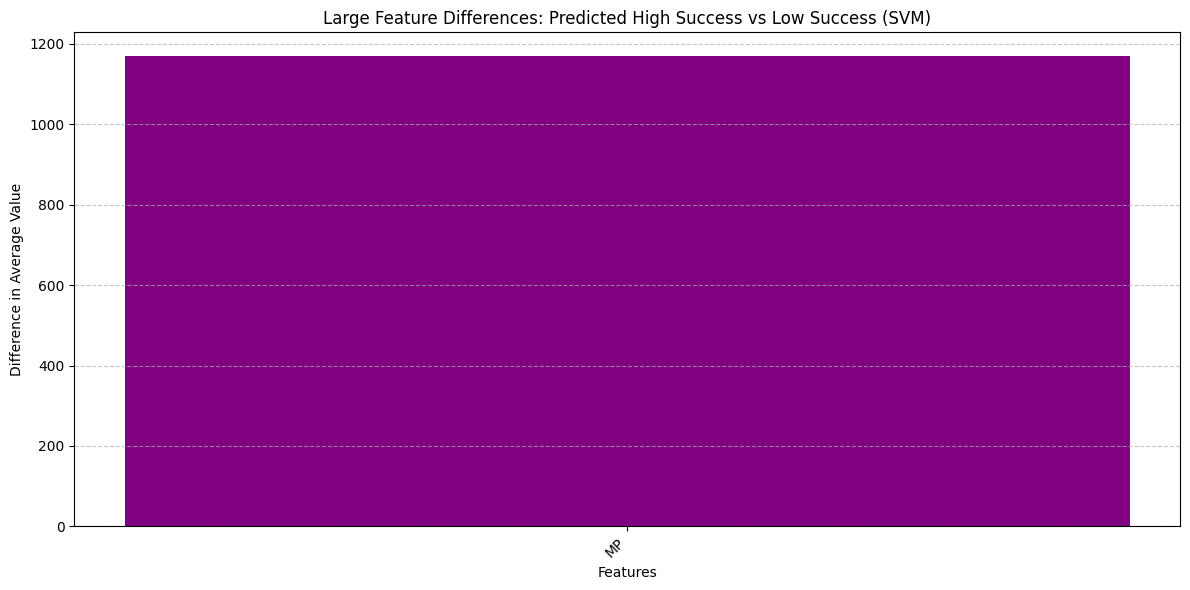

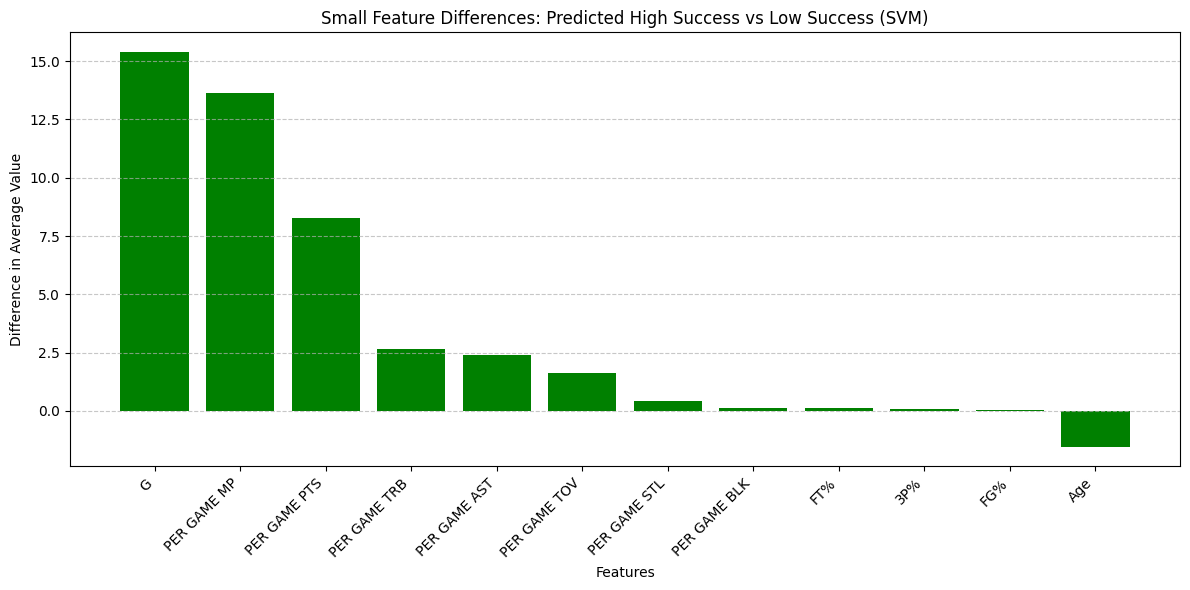

In [15]:
import matplotlib.pyplot as plt

# Calculate differences between average stats for predicted classes
diff_stats_svm = (
    average_stats_svm.loc["High Success"] - average_stats_svm.loc["Low Success"]
)
diff_stats_svm = diff_stats_svm.sort_values(ascending=False)

# Define a threshold to separate large vs small differences
threshold = 100  # Adjust this value depending on the scale of your metrics

# Split into large and small metrics
large_metrics_svm = diff_stats_svm[diff_stats_svm > threshold]
small_metrics_svm = diff_stats_svm[diff_stats_svm <= threshold]

# Plot the large metrics
if not large_metrics_svm.empty:
    plt.figure(figsize=(12, 6))
    plt.bar(large_metrics_svm.index, large_metrics_svm, color="purple")
    plt.title("Large Feature Differences: Predicted High Success vs Low Success (SVM)")
    plt.ylabel("Difference in Average Value")
    plt.xlabel("Features")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No large metrics to display based on the threshold.")

# Plot the small metrics
if not small_metrics_svm.empty:
    plt.figure(figsize=(12, 6))
    plt.bar(small_metrics_svm.index, small_metrics_svm, color="green")
    plt.title("Small Feature Differences: Predicted High Success vs Low Success (SVM)")
    plt.ylabel("Difference in Average Value")
    plt.xlabel("Features")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No small metrics to display based on the threshold.")


SHAP analysis

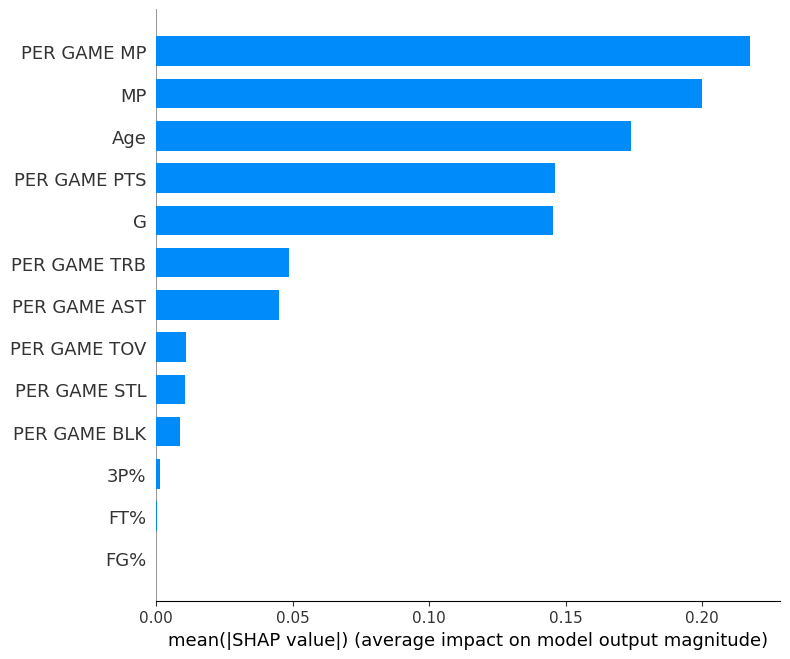

In [38]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# Ensure X_test contains only the features used during model training

# Initialize SHAP Permutation Explainer for SVM
explainer = shap.PermutationExplainer(best_svm.predict, X_test)

# Compute SHAP values for the test set
shap_values = explainer(X_test)

# SHAP summary plot (global feature importance)
shap.summary_plot(shap_values, X_test, plot_type="bar")
# plt.title("Global Feature Importance (SVM)", fontsize=14, pad=10)
# plt.show()

# # SHAP beeswarm plot for individual contributions
# shap.summary_plot(shap_values, X_test)
# plt.title("SHAP Summary Plot (SVM)", fontsize=14, pad=10)
# plt.show()



PermutationExplainer explainer: 84it [00:10,  3.39s/it]                


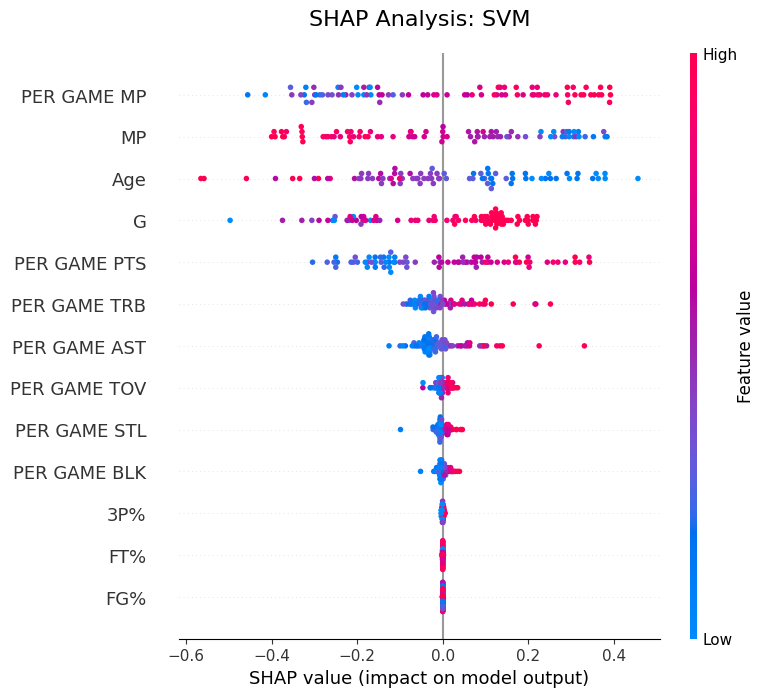

In [28]:
import shap
import matplotlib.pyplot as plt

# Initialize Permutation Explainer for SVM
explainer = shap.PermutationExplainer(best_svm.predict, X_test)

# Compute SHAP values for SVM model
shap_values = explainer(X_test)

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=features, show=False)

# Add a title after the SHAP plot is rendered
plt.title("SHAP Analysis: SVM", fontsize=16, pad=20)

# Display the plot with the title
plt.show()


Hyperparameter tuning

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1_macro')
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [21]:
# Train the Random Forest with optimized parameters
optimized_rf = RandomForestClassifier(
    max_depth=10,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=200,
    random_state=42
)
optimized_rf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_optimized = optimized_rf.predict(X_test)

# Evaluate the optimized model
print("\nOptimized Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_optimized))
print("\nOptimized Classification Report:")
print(classification_report(y_test, y_pred_optimized))
print("\nOptimized Accuracy Score:", accuracy_score(y_test, y_pred_optimized))

# Feature Importance
print("\nFeature Importance:")
feature_importances = pd.Series(optimized_rf.feature_importances_, index=features).sort_values(ascending=False)
print(feature_importances)



Optimized Confusion Matrix:
[[33 21]
 [ 9 20]]

Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.61      0.69        54
           1       0.49      0.69      0.57        29

    accuracy                           0.64        83
   macro avg       0.64      0.65      0.63        83
weighted avg       0.68      0.64      0.65        83


Optimized Accuracy Score: 0.6385542168674698

Feature Importance:
PER GAME TRB    0.113421
PER GAME PTS    0.104311
FG%             0.101088
PER GAME STL    0.088138
PER GAME MP     0.079470
FT%             0.078225
MP              0.076897
PER GAME BLK    0.076437
PER GAME TOV    0.075429
PER GAME AST    0.070826
3P%             0.054670
G               0.041239
Age             0.039848
dtype: float64
